# Résolution d'equations linéaires d'ordre 1 par la méthode d'Euler

La méthode d'Euler est une méthode de résolution d'équations dfférentielles du type $$\frac{dy}{dx} = F(y,x)$$

La méthode utilise le principe suivant : par définition on a $$\frac{dy}{dx}(x) = \lim_{h\rightarrow 0} \frac{y(x+h)-y(x)}{h} $$

On peut donc approximer numériquement la dérivée d'une fonction, lorsque $h$ est suffisamment petit, par $$\frac{dy}{dx} \approx \frac{y(x+h)-y(x)}{h}$$

##### Importation des modules utiles

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## A - Etude d'un exemple

On étudie l'équation différentielle suivante : $$\frac{df}{dx} = -2xf(x) \qquad \text{avec} \qquad f(0) = 1$$

Sa solution exacte est $f:x \mapsto \exp(-x^2)$

### 1 - Méthode d'Euler explicite

La dérivée de la fonction $f$ est approximée, pour $h$ suffisament petit, par $$\frac{df}{dx} \approx \frac{f(x+h)-f(x)}{h} = -2xf(x)$$

On a donc $$ f(x+h) = (1-2hx)f(x) $$

On note $x_0 = 0$ et $x_n = nh$, de sorte que $x_n+h = x_{n+1}$. 
L'équation précédente s'écrit $$ f(x_{n+1}) = (1-2hx_n)f(x_n) $$

Enfin, on note $f_n = f(x_n)$, ainsi $$ f_{n+1} = (1-2hx_n)f_n$$

On dispose donc d'une relation de récurrence qui nous permet de calculer les termes de cette suite.

Le programme ci-dessous implémente ce calcul.

In [2]:
b = 3.0 # dernier terme de calcul
h = 0.1 # le pas de calcul de l'algorithme
N = int(b/h) # nombre de termes à calculer


x = np.zeros((N)) # on cree deux tableaux vides
f = np.zeros((N))

x[0] = 0.0 # on initialise avec f(0) = 1.0
f[0] = 1.0 

for i in range(N-1):
    x[i+1] = x[i] + h
    f[i+1] = (1-2*h*x[i]) * f[i]

Voici le tracé, comparé à la solution exacte.

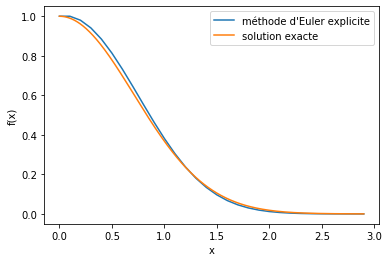

In [3]:
plt.plot(x,f,label="méthode d'Euler explicite")
u = np.linspace(min(x),max(x),num=1000)
plt.plot(u,np.exp(-u**2),label="solution exacte")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

Et voici le tracé des erreurs

### Méthode d'Euler implicite

La dérivée de la fonction $f$ est approximée, pour $h$ suffisament petit, par $$\frac{df}{dx} \approx \frac{f(x)-f(x-h)}{h} = -2xf(x)$$

On a donc $$ f(x) = \frac{1}{1+2hx} f(x-h) $$

La discrétisation donne $$f_n = \frac{1}{1+2hx_n} f_{n-1}$$

On dispose donc d'une relation de récurrence qui nous permet de calculer les termes de cette suite.

Le programme ci-dessous implémente ce calcul.

In [4]:
b = 3.0 # dernier terme de calcul
h = 0.1 # le pas de calcul de l'algorithme
N = int(b/h) # nombre de termes à calculer


x = np.zeros((N)) # on cree deux tableaux vides
f = np.zeros((N))

x[0] = 0.0 # on initialise avec f(0) = 1.0
f[0] = 1.0 

for i in range(1,N):
    x[i] = x[i-1] + h
    f[i] = 1/(1+2*h*x[i]) * f[i-1]

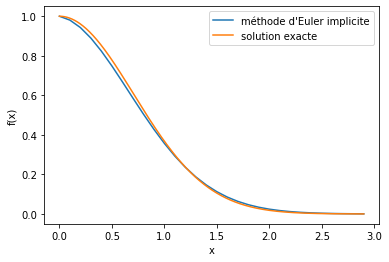

In [5]:
plt.plot(x,f,label="méthode d'Euler implicite")
u = np.linspace(min(x),max(x),num=1000)
plt.plot(u,np.exp(-u**2),label="solution exacte")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

## B - Chargement d'un condensateur par une rampe

On étudie l'équation $$\tau \frac{du}{dt} + u(t) = e(t) $$

avec la condition initiale $u(0)=0$ et $$e(t) = \begin{cases} 0 & \text{pour } t<0 \\
 at & \text{pour } 0<t<\frac{E}{a} \\
  E & \text{pour } t>\frac{E}{a}\end{cases} $$

Définissons cette fonction $e(t)$ :

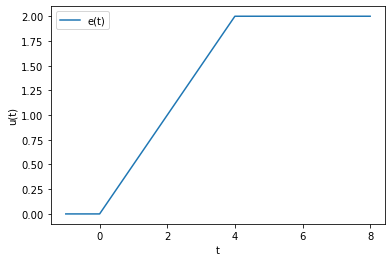

In [6]:
a = 0.5
E = 2.0
def e(t):
    if t<0.0:
        return 0
    elif t<E/a:
        return a*t
    else:
        return E

t1 = np.linspace(-1,2*E/a,num=1000)
et1 = np.zeros(len(t1))
for i in range(len(t1)):
    et1[i] = e(t1[i])

plt.plot(t1,et1,label='e(t)')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.show()

Utilisons la méthode d'Euler explicite : $$ u_{n+1} = (1-\frac{h}{\tau})u_n + \frac{h}{\tau}e_n $$ 

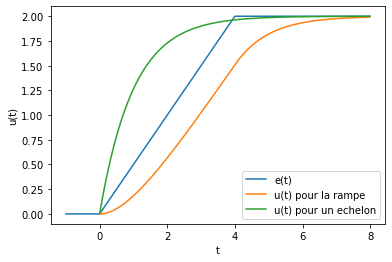

In [7]:
h = 0.01
tau = 1.0
b = 8.0
N = int(b/h)

t = np.zeros((N))
u = np.zeros((N))
t[0] = 0.0
u[0] = 0.0
for i in range(N-1):
    t[i+1] = t[i] + h
    u[i+1] = (1-h/tau)*u[i] + h/tau*e(t[i]) 

plt.plot(t1,et1,label='e(t)')
plt.plot(t,u,label='u(t) pour la rampe')
plt.plot(t,E*(1-np.exp(-t/tau)),label='u(t) pour un echelon')
#plt.plot(t,a*t+a*tau*(np.exp(-t/tau)-1) )
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.show()